In [1]:
# =============================================================
# NOTEBOOK 15 — ANÁLISIS COMPARATIVO DE MODELOS DE SEGMENTACIÓN
# U-Net vs Attention U-Net vs U-Net++
# =============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.2)

# =============================================================
# 1. Cargar los resultados
# =============================================================

df_unet     = pd.read_csv("Resultados Modelos/unet_results.csv")
df_att      = pd.read_csv("Resultados Modelos/att_unet_results.csv")
df_unetpp   = pd.read_csv("Resultados Modelos/unetpp_results.csv")

df_unet['model']   = "U-Net"
df_att['model']    = "Attention U-Net"
df_unetpp['model'] = "U-Net++"

df_all = pd.concat([df_unet, df_att, df_unetpp], axis=0)
df_all.head()

,center,img,dice,iou,sensitivity,specificity,model
0,Goya_Madrid,C:/Users/Usuario/Desktop/ANGEL/MASTER/TFM/data...,0.932791,0.874047,0.960058,0.983312,U-Net
1,Barcelona,C:/Users/Usuario/Desktop/ANGEL/MASTER/TFM/data...,0.91648,0.845836,0.885460,0.994860,U-Net
2,Goya_Madrid,C:/Users/Usuario/Desktop/ANGEL/MASTER/TFM/data...,0.912916,0.839784,0.892111,0.990378,U-Net
3,Guadalajara,C:/Users/Usuario/Desktop/ANGEL/MASTER/TFM/data...,0.941388,0.889266,0.963505,0.990573,U-Net
4,Getafe,C:/Users/Usuario/Desktop/ANGEL/MASTER/TFM/data...,0.982744,0.966074,0.988013,0.995469,U-Net


In [2]:
import re

def clean_tensor_column(series):
    """Convierte strings como 'tf.Tensor(0.92...)' en floats reales."""
    cleaned = []

    for v in series:
        if isinstance(v, str):
            # buscar número dentro de la cadena
            match = re.search(r"[-+]?\d*\.\d+|\d+", v)
            if match:
                cleaned.append(float(match.group()))
            else:
                cleaned.append(np.nan)
        else:
            # si ya es float o int
            cleaned.append(float(v))
    
    return pd.to_numeric(cleaned, errors="coerce")
    
# Reparar columnas numéricas en df_all
for col in ["dice","iou","sensitivity","specificity"]:
    df_all[col] = clean_tensor_column(df_all[col])

df_all.head()

,center,img,dice,iou,sensitivity,specificity,model
0,Goya_Madrid,C:/Users/Usuario/Desktop/ANGEL/MASTER/TFM/data...,0.932791,0.874047,0.960058,0.983312,U-Net
1,Barcelona,C:/Users/Usuario/Desktop/ANGEL/MASTER/TFM/data...,0.916480,0.845836,0.885460,0.994860,U-Net
2,Goya_Madrid,C:/Users/Usuario/Desktop/ANGEL/MASTER/TFM/data...,0.912916,0.839784,0.892111,0.990378,U-Net
3,Guadalajara,C:/Users/Usuario/Desktop/ANGEL/MASTER/TFM/data...,0.941388,0.889266,0.963505,0.990573,U-Net
4,Getafe,C:/Users/Usuario/Desktop/ANGEL/MASTER/TFM/data...,0.982744,0.966074,0.988013,0.995469,U-Net


In [3]:
# =============================================================
# 2. Comparación global de métricas
# =============================================================

global_metrics = df_all.groupby("model")[["dice", "iou", "sensitivity", "specificity"]].mean()

# Renombrar métricas para la leyenda
global_metrics = global_metrics.rename(columns={
    "dice": "Dice",
    "iou": "IoU",
    "sensitivity": "Sensibilidad",
    "specificity": "Especificidad"
})

global_metrics

,Dice,IoU,Sensibilidad,Especificidad
model,,,,
Attention U-Net,0.900570,0.832632,0.889105,0.990594
U-Net,0.889164,0.812950,0.890482,0.986805
U-Net++,0.899039,0.828439,0.896560,0.989037


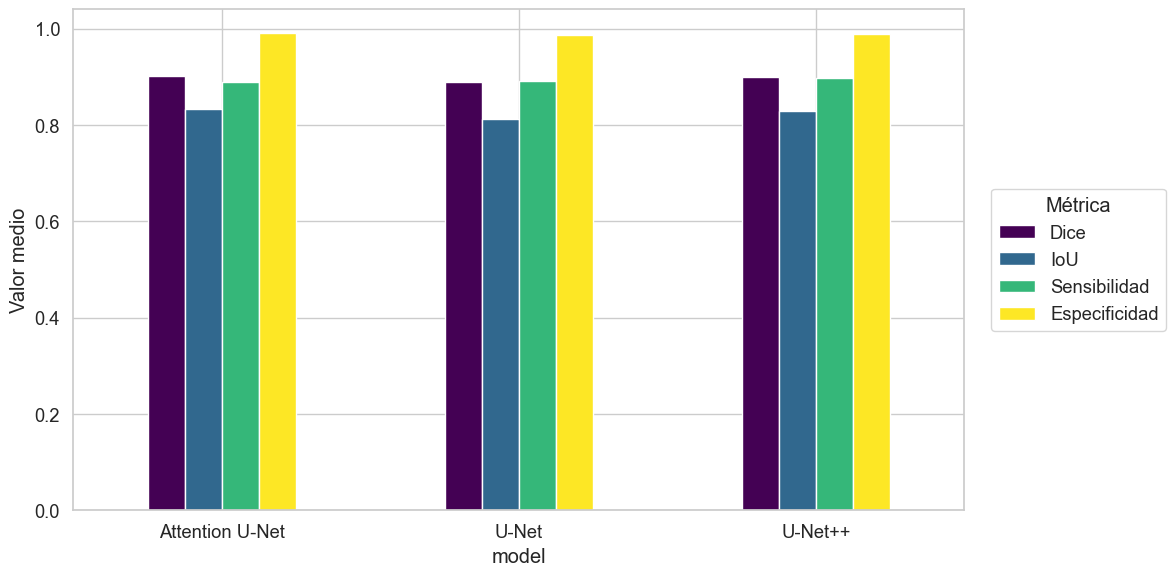

In [4]:
# =============================================================
# 3. Visualización — barras comparando modelos
# =============================================================

ax = global_metrics.plot(
    kind="bar",
    figsize=(12, 6),
    colormap="viridis"
)

# Etiquetas
ax.set_ylabel("Valor medio")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Leyenda fuera del gráfico (a la derecha)
ax.legend(
    title="Métrica",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5)
)

plt.tight_layout()
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7672\2853602165.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x="model", y="dice", palette="Set2")


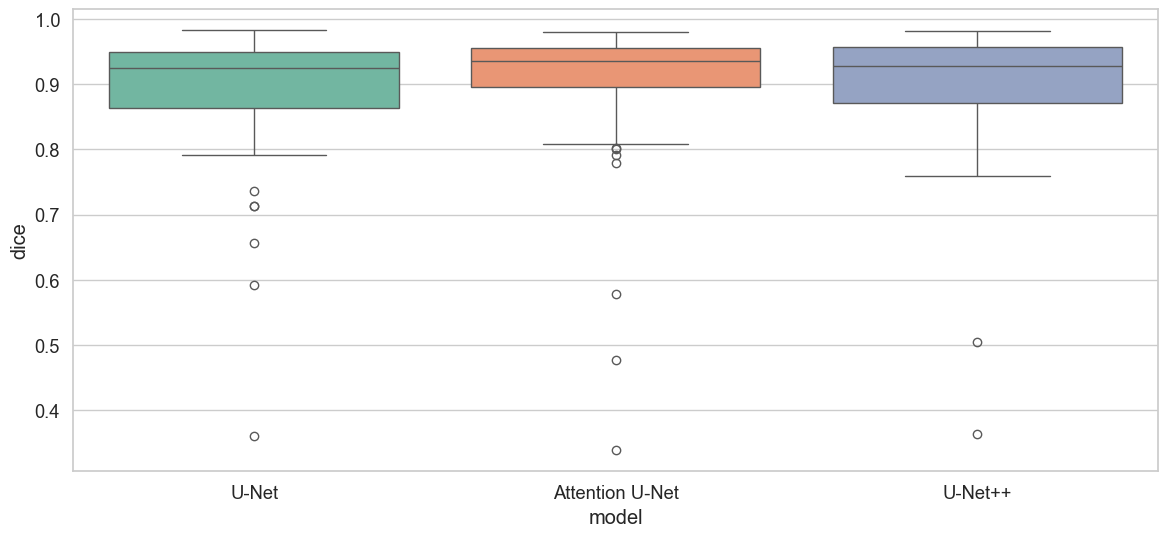

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7672\2853602165.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x="model", y=metric, palette="Set3")


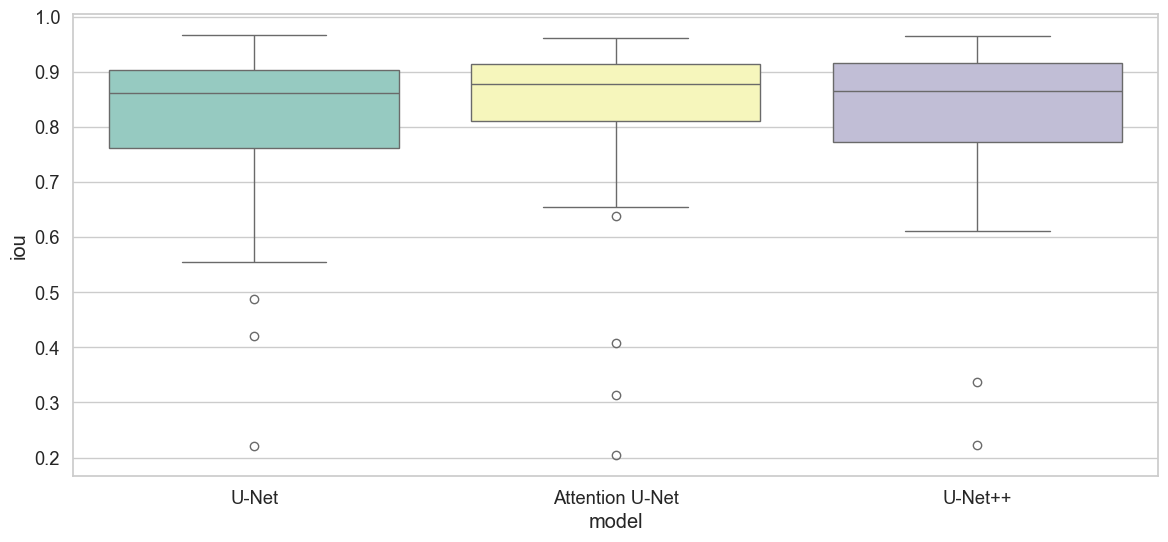

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7672\2853602165.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x="model", y=metric, palette="Set3")


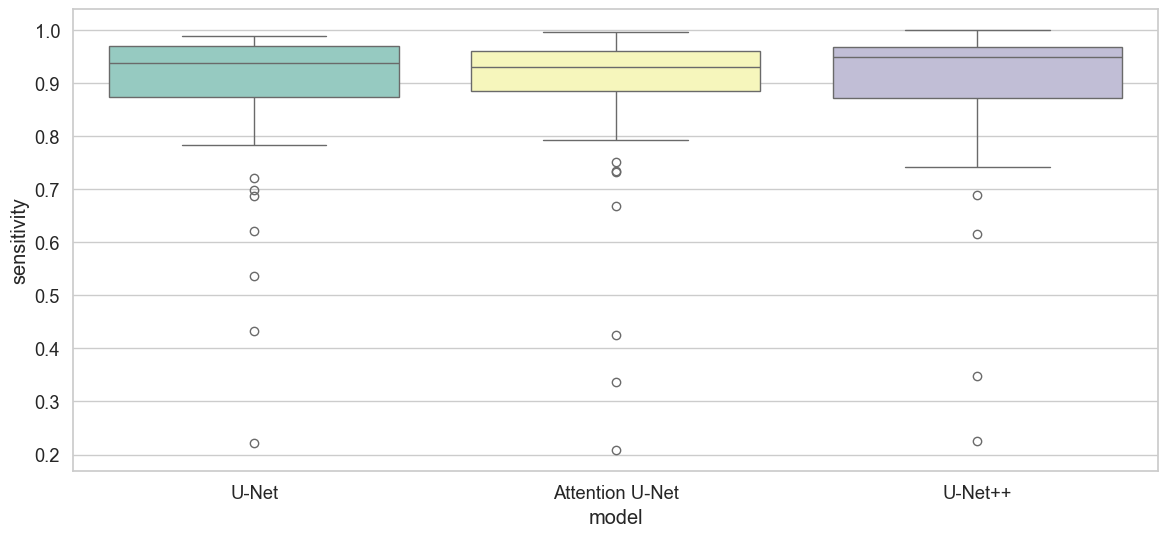

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7672\2853602165.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x="model", y=metric, palette="Set3")


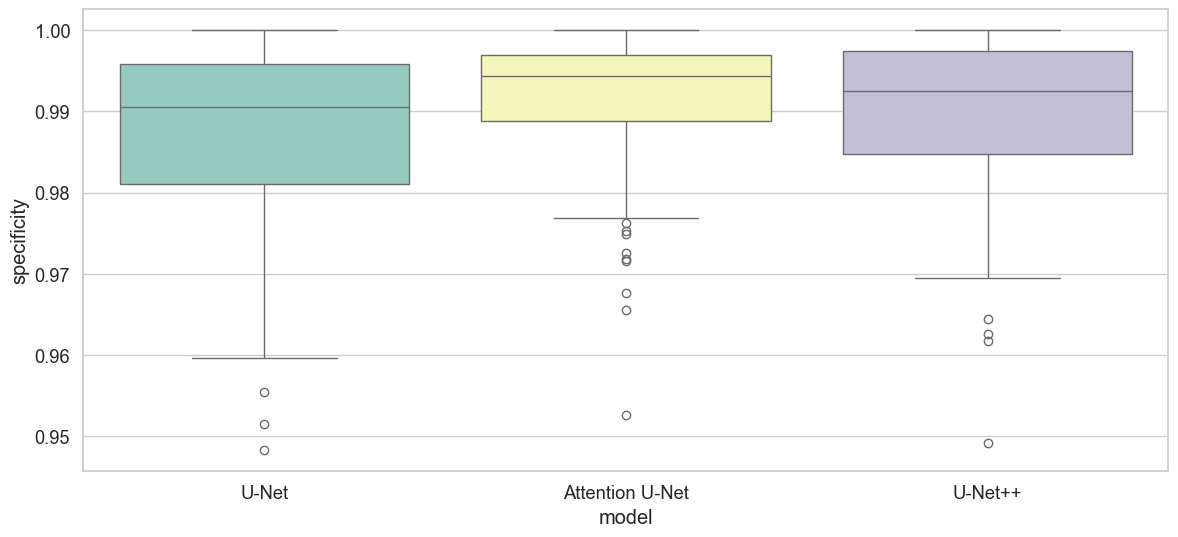

In [5]:
# =============================================================
# 4. Boxplots — distribución de métricas por imagen
# =============================================================

plt.figure(figsize=(14,6))
sns.boxplot(data=df_all, x="model", y="dice", palette="Set2")
#plt.title("Distribución del Dice por modelo")
plt.show()

for metric in ["iou", "sensitivity", "specificity"]:
    plt.figure(figsize=(14,6))
    sns.boxplot(data=df_all, x="model", y=metric, palette="Set3")
    #plt.title(f"Distribución de {metric} por modelo")
    plt.show()


In [6]:
# =============================================================
# 5. Análisis por centro
# =============================================================

center_stats = df_all.groupby(["center","model"])[["dice","iou"]].mean().reset_index()
center_stats

,center,model,dice,iou
0,Albacete,Attention U-Net,0.910774,0.839780
1,Albacete,U-Net,0.883489,0.798944
2,Albacete,U-Net++,0.879924,0.790157
3,Barcelona,Attention U-Net,0.939823,0.887199
4,Barcelona,U-Net,0.916038,0.848650
5,Barcelona,U-Net++,0.926544,0.864546
6,Caceres,Attention U-Net,0.820723,0.742723
7,Caceres,U-Net,0.829888,0.753606
8,Caceres,U-Net++,0.827346,0.749476
9,Getafe,Attention U-Net,0.924224,0.862715


C:\Users\Usuario\AppData\Local\Temp\ipykernel_7672\4248957524.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


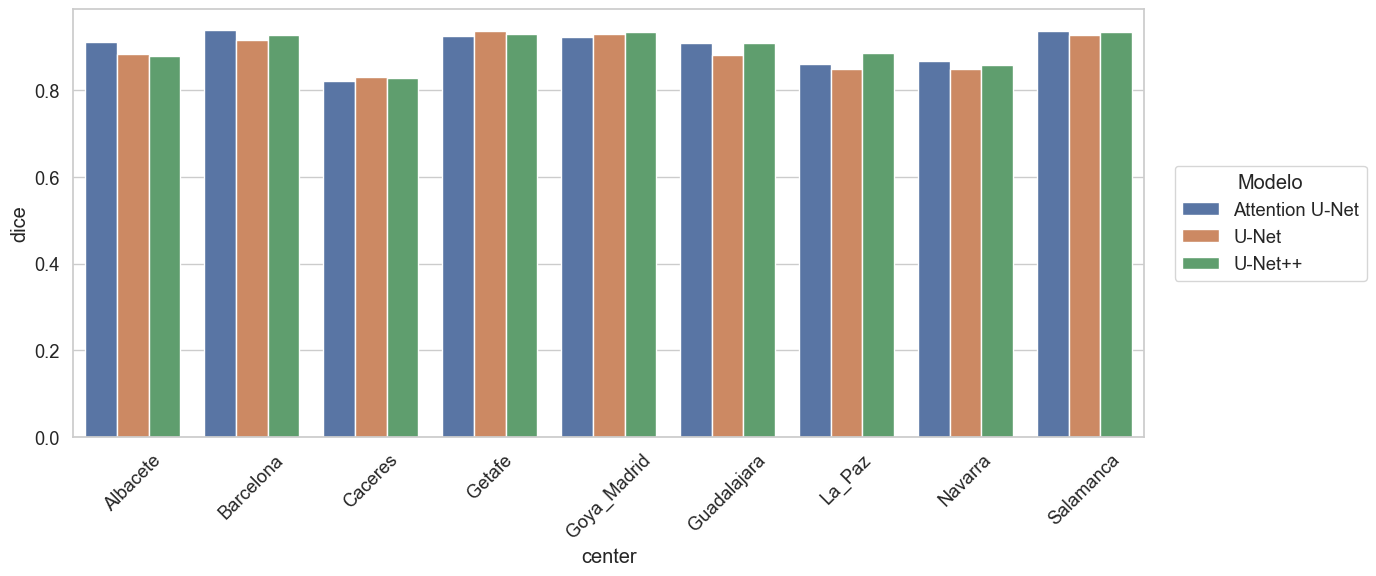

In [21]:
# =============================================================
# 6. Visualización comparativa por centro
# =============================================================

plt.figure(figsize=(14, 6))
ax = sns.barplot(
    data=center_stats,
    x="center",
    y="dice",
    hue="model"
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Leyenda fuera del gráfico (a la derecha)
ax.legend(
    title="Modelo",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5)
)

plt.tight_layout()
plt.show()


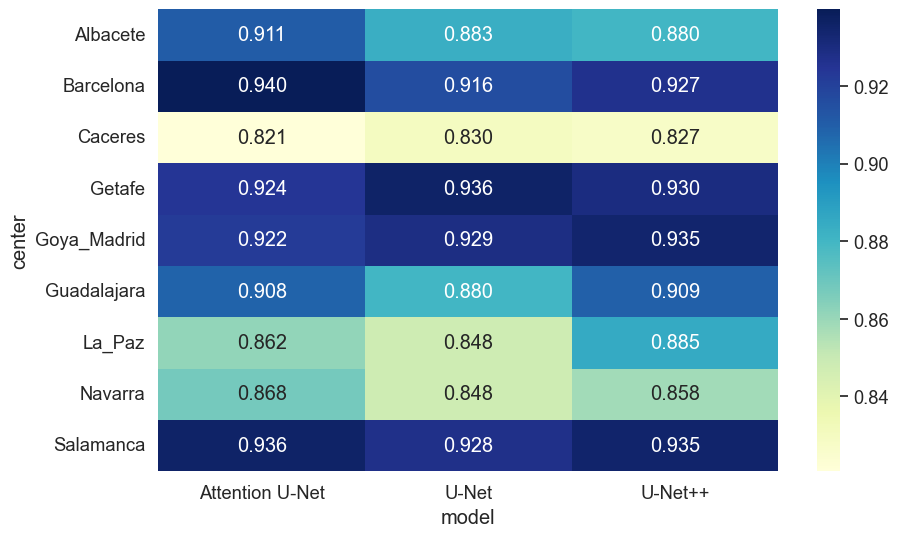

In [22]:
# =============================================================
# 7. Heatmap de rendimiento relativo
# =============================================================

pivot = center_stats.pivot(index="center", columns="model", values="dice")

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".3f")
#plt.title("Rendimiento relativo (Dice) por centro y modelo")
plt.show()

In [9]:
# =============================================================
# 8. Ranking de modelos
# =============================================================

rankings = center_stats.groupby("model")["dice"].mean().rank(ascending=False)
rankings

model
Attention U-Net    1.0
U-Net              3.0
U-Net++            2.0
Name: dice, dtype: float64

In [10]:
# =============================================================
# 9. Diferencias estadísticas entre modelos
# =============================================================

from scipy.stats import wilcoxon
import numpy as np
import re

def clean_list(values):
    cleaned = []
    for v in values:
        if isinstance(v, str):
            match = re.search(r"[-+]?\d*\.\d+|\d+", v)
            if match:
                cleaned.append(float(match.group()))
            else:
                cleaned.append(np.nan)
        else:
            cleaned.append(float(v))
    return np.array(cleaned, dtype=np.float32)



dice_unet     = df_unet["dice"]
dice_att      = df_att["dice"]
dice_unetpp   = df_unetpp["dice"]

dice_unet   = clean_list(dice_unet)
dice_att    = clean_list(dice_att)
dice_unetpp = clean_list(dice_unetpp)

iou_unet   = df_unet["iou"]
iou_att    = df_att["iou"]
iou_unetpp = df_unetpp["iou"]

iou_unet   = clean_list(iou_unet)
iou_att    = clean_list(iou_att)
iou_unetpp = clean_list(iou_unetpp)

print("=== Comparación estadística Dice ===\r\n")
print("U-Net vs Attention U-Net:", wilcoxon(dice_unet, dice_att))
print("U-Net vs U-Net++:", wilcoxon(dice_unet, dice_unetpp))
print("Attention U-Net vs U-Net++:", wilcoxon(dice_att, dice_unetpp),"\r\n\r\n")

print("=== Comparación estadística IoU ===\r\n")
print("U-Net vs Attention U-Net (IoU):", wilcoxon(iou_unet, iou_att))
print("U-Net vs U-Net++ (IoU):", wilcoxon(iou_unet, iou_unetpp))
print("Attention U-Net vs U-Net++ (IoU):", wilcoxon(iou_att, iou_unetpp))

=== Comparación estadística Dice ===

U-Net vs Attention U-Net: WilcoxonResult(statistic=750.0, pvalue=0.015101105724612127)
U-Net vs U-Net++: WilcoxonResult(statistic=768.0, pvalue=0.020476207033592583)
Attention U-Net vs U-Net++: WilcoxonResult(statistic=967.0, pvalue=0.2826331062587275) 


=== Comparación estadística IoU ===

U-Net vs Attention U-Net (IoU): WilcoxonResult(statistic=736.0, pvalue=0.011822511362447849)
U-Net vs U-Net++ (IoU): WilcoxonResult(statistic=776.0, pvalue=0.023357721105076477)
Attention U-Net vs U-Net++ (IoU): WilcoxonResult(statistic=973.0, pvalue=0.2997623303484983)


In [11]:
# =============================================================
# 10. Identificación de casos difíciles (hard cases)
# =============================================================

df_all["error"] = 1 - df_all["dice"]

hard_cases = df_all.sort_values("error", ascending=False).head(20)
hard_cases

,center,img,dice,iou,sensitivity,specificity,model,error
28,Caceres,C:/Users/Usuario/Desktop/ANGEL/MASTER/TFM/data...,0.339002,0.204096,0.208088,0.998127,Attention U-Net,0.660998
28,Caceres,C:/Users/Usuario/Desktop/ANGEL/MASTER/TFM/data...,0.361573,0.220683,0.221282,0.999740,U-Net,0.638427
28,Caceres,C:/Users/Usuario/Desktop/ANGEL/MASTER/TFM/data...,0.363192,0.221890,0.224853,0.998722,U-Net++,0.636808
47,La_Paz,C:/Users/Usuario/Desktop/ANGEL/MASTER/TFM/data...,0.477047,0.313238,0.336690,0.984327,Attention U-Net,0.522953
40,Navarra,C:/Users/Usuario/Desktop/ANGEL/MASTER/TFM/data...,0.504436,0.337288,0.347890,0.991810,U-Net++,0.495564
40,Navarra,C:/Users/Usuario/Desktop/ANGEL/MASTER/TFM/data...,0.578809,0.407270,0.424962,0.988682,Attention U-Net,0.421191
40,Navarra,C:/Users/Usuario/Desktop/ANGEL/MASTER/TFM/data...,0.592415,0.420873,0.433591,0.992127,U-Net,0.407585
47,La_Paz,C:/Users/Usuario/Desktop/ANGEL/MASTER/TFM/data...,0.656257,0.488380,0.535945,0.979611,U-Net,0.343743
35,Navarra,C:/Users/Usuario/Desktop/ANGEL/MASTER/TFM/data...,0.713535,0.554648,0.838908,0.948291,U-Net,0.286465
65,La_Paz,C:/Users/Usuario/Desktop/ANGEL/MASTER/TFM/data...,0.714069,0.555293,0.720781,0.978811,U-Net,0.285931


In [12]:
# =============================================================
# 11. Conclusión automática basada en datos
# =============================================================

best_model = global_metrics["dice"].idxmax()
print(f"El mejor modelo global según Dice es: {best_model}")

best_center = center_stats.sort_values("dice", ascending=False).iloc[0]
print("\nMejor centro y modelo:")
print(best_center)

El mejor modelo global según Dice es: Attention U-Net

Mejor centro y modelo:
center          Barcelona
model     Attention U-Net
dice             0.939823
iou              0.887199
Name: 3, dtype: object


In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# 12. Cargar los CSV de métricas de area y profundidad
# ==========================================

BASE = "Medidas Areas por Modelos/"

paths = {
    "UNet": os.path.join(BASE, "muscle_metrics_with_depth_UNet.csv"),
    "Attention_UNet": os.path.join(BASE, "muscle_metrics_with_depth_Attention_UNet.csv"),
    "UNetPlusPlus": os.path.join(BASE, "muscle_metrics_with_depth_UNetPlusPlus.csv")
}

dfs = []
for model_name, path in paths.items():
    df = pd.read_csv(path)
    df["model"] = model_name

    # Solo nos interesan estas variables
    df = df[["center", "image", "area_cm2", "thickness_cm", "model"]]

    dfs.append(df)

df_all = pd.concat(dfs, ignore_index=True)

print("\nDataset combinado cargado correctamente.")
print(df_all.head())
print("\nTotal filas:", len(df_all))


Dataset combinado cargado correctamente.
     center                                              image  area_cm2  \
0  Albacete  C:/Users/Usuario/Desktop/ANGEL/MASTER/TFM/data...     4.342   
1  Albacete  C:/Users/Usuario/Desktop/ANGEL/MASTER/TFM/data...     2.737   
2  Albacete  C:/Users/Usuario/Desktop/ANGEL/MASTER/TFM/data...     3.126   
3  Albacete  C:/Users/Usuario/Desktop/ANGEL/MASTER/TFM/data...     1.752   
4  Albacete  C:/Users/Usuario/Desktop/ANGEL/MASTER/TFM/data...     2.883   

   thickness_cm model  
0         1.344  UNet  
1         1.031  UNet  
2         1.406  UNet  
3         0.844  UNet  
4         1.547  UNet  

Total filas: 13758


In [14]:
# ==========================================
# 13. Estadísticos descriptivos globales
# ==========================================

stats_global = df_all.groupby("model")[["area_cm2", "thickness_cm"]].agg(
    ["mean", "std", "median", "min", "max"]
)

print("\n======= Estadísticos descriptivos por modelo =======")
print(stats_global)


======= Estadísticos descriptivos por modelo =======
                area_cm2                                 thickness_cm  \
                    mean       std median    min     max         mean   
model                                                                   
Attention_UNet  4.465826  1.325081  4.424  0.000   9.790     1.854790   
UNet            4.614765  1.378690  4.596  0.000  11.267     1.935221   
UNetPlusPlus    4.553489  1.323047  4.539  0.012   9.817     1.895775   

                                               
                     std median    min    max  
model                                          
Attention_UNet  0.617771  1.703  0.000  4.859  
UNet            0.656525  1.766  0.000  4.844  
UNetPlusPlus    0.609226  1.750  0.281  5.000  


In [15]:
# ==========================================
# 14. Rango intercuartílico (IQR)
# ==========================================

def compute_iqr(series):
    return np.percentile(series, 75) - np.percentile(series, 25)

iqr_data = {
    model: {
        "area_IQR": compute_iqr(df_all[df_all["model"] == model]["area_cm2"]),
        "thickness_IQR": compute_iqr(df_all[df_all["model"] == model]["thickness_cm"])
    }
    for model in df_all["model"].unique()
}

print("\n======= Rango intercuartílico (IQR) =======")
for model, values in iqr_data.items():
    print(model, values)


======= Rango intercuartílico (IQR) =======
UNet {'area_IQR': 1.604, 'thickness_IQR': 0.8589999999999998}
Attention_UNet {'area_IQR': 1.64975, 'thickness_IQR': 0.671}
UNetPlusPlus {'area_IQR': 1.6137500000000005, 'thickness_IQR': 0.7339999999999998}


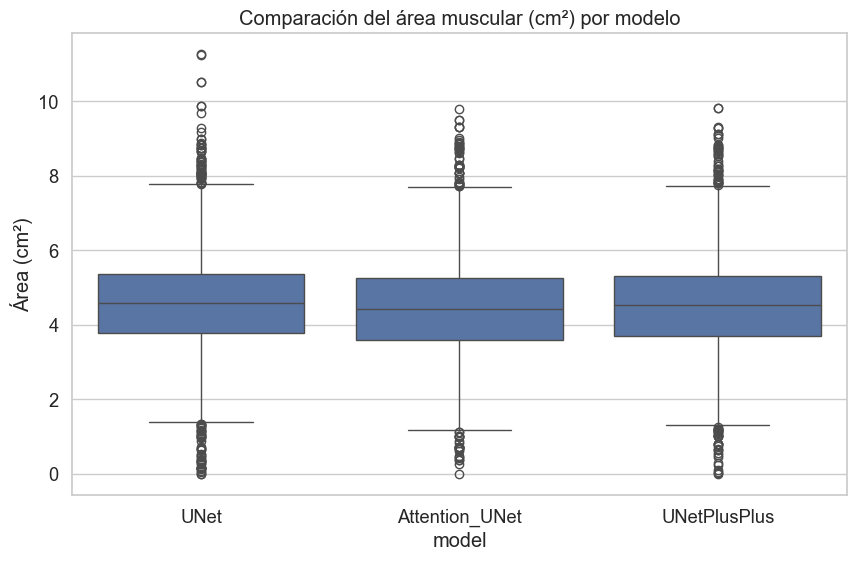

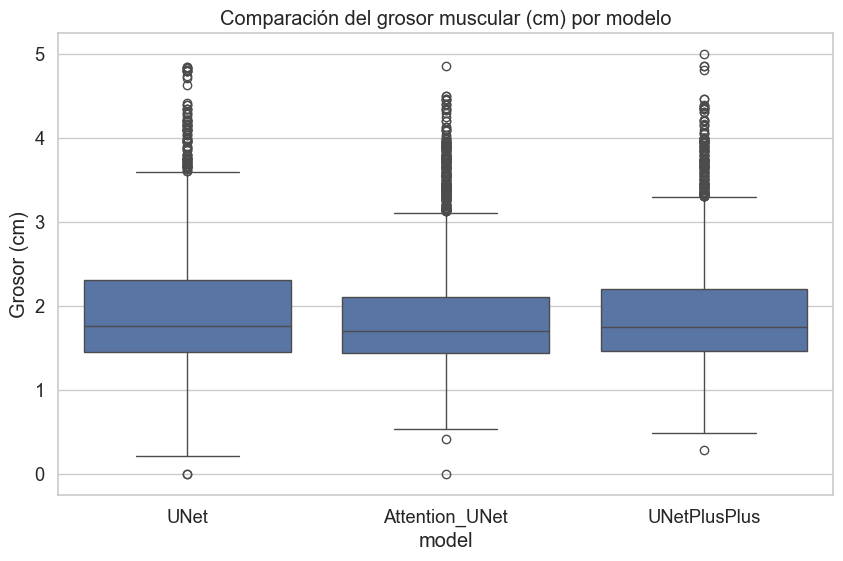

In [16]:
# ==========================================
# 15. Gráficos comparativos
# ==========================================

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_all, x="model", y="area_cm2")
plt.title("Comparación del área muscular (cm²) por modelo")
plt.ylabel("Área (cm²)")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_all, x="model", y="thickness_cm")
plt.title("Comparación del grosor muscular (cm) por modelo")
plt.ylabel("Grosor (cm)")
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7672\1317488150.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corr_by_model = df_all.groupby("model").apply(



======= Correlación área–grosor por modelo =======
model
Attention_UNet    0.457939
UNet              0.583440
UNetPlusPlus      0.440558
dtype: float64


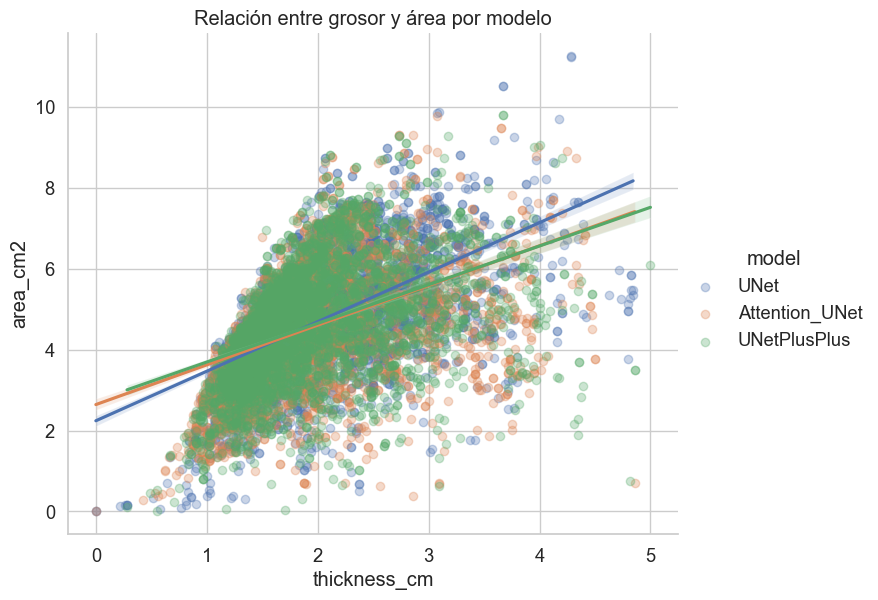

In [17]:
# ==========================================
# 16. Correlación área–grosor por modelo
# ==========================================

corr_by_model = df_all.groupby("model").apply(
    lambda x: x["area_cm2"].corr(x["thickness_cm"])
)

print("\n======= Correlación área–grosor por modelo =======")
print(corr_by_model)

# Scatterplot general
sns.lmplot(
    data=df_all, x="thickness_cm", y="area_cm2",
    hue="model", height=6, aspect=1.2, scatter_kws={"alpha": 0.3}
)
plt.title("Relación entre grosor y área por modelo")
plt.show()

In [18]:
# ==========================================
# 17. Estadísticas por centro
# ==========================================

stats_center = df_all.groupby(["center", "model"])[["area_cm2", "thickness_cm"]].mean()

print("\n======= Estadísticas por centro y modelo (media) =======")
print(stats_center)


======= Estadísticas por centro y modelo (media) =======
                            area_cm2  thickness_cm
center      model                                 
Albacete    Attention_UNet  4.507904      1.854573
            UNet            4.584981      1.935217
            UNetPlusPlus    4.563298      1.902381
Barcelona   Attention_UNet  4.092889      1.850568
            UNet            4.043205      1.857684
            UNetPlusPlus    4.196149      1.863710
Caceres     Attention_UNet  4.807950      1.935861
            UNet            4.923157      1.997248
            UNetPlusPlus    4.906945      1.982326
Getafe      Attention_UNet  4.850325      1.698675
            UNet            5.028912      1.850325
            UNetPlusPlus    4.908637      1.669537
Goya_Madrid Attention_UNet  4.519540      1.888251
            UNet            5.044394      2.167728
            UNetPlusPlus    4.679206      1.948596
Guadalajara Attention_UNet  3.607646      1.473983
            UNet        

In [19]:
# ==========================================
# 7. Exportar resultados a CSV
# ==========================================

stats_global.to_csv("metricas_globales_area_grosor.csv")
stats_center.to_csv("metricas_por_centro_area_grosor.csv")

print("\nArchivos exportados:")
print(" - metricas_globales_area_grosor.csv")
print(" - metricas_por_centro_area_grosor.csv")


Archivos exportados:
 - metricas_globales_area_grosor.csv
 - metricas_por_centro_area_grosor.csv
